Mental Health in Tech: People working in tech are often at their desks for extended amounts of time. 
Explore how this trend correlates with mental health. Examine the data coollected through surveys
search for trends. Find out if there is a link between mental health and companies that offer wellness programs. 
What do the results show you about the state of mental health in tech? 
Can you suggest steps that companies can take to help their employees?


MAIN QUESTIONS

1.Does remote work affect an individual's mental health more compared to someone who works on site?(self employed VS work in organisation ) (Jane)

2.Are there differences in mental health between those working in startups vs large tech companies(Size of company)? (Loku)

3.Is mental health more prevalent in different regions?(US) Does US have a bigger issue with mental health compared to other countries?(Keegan)

4.Does mental health interfere with work? (Lishi ) (Also note, josh said this may be too broad of a question, maybe add more details and specifics)



In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import pprint
import seaborn as sns

In [2]:
# Define the path to the CSV file
file_path = Path('files/mental_heath_2016.csv')  # Replace 'your_file_name.csv' with the actual file name

# Read the CSV file into a DataFrame
data_df = pd.read_csv(file_path)

# Display the DataFrame
data_df.head()

,Are you self-employed?,How many employees does your company or organization have?,Is your employer primarily a tech company/organization?,Is your primary role within your company related to tech/IT?,Does your employer provide mental health benefits as part of healthcare coverage?,Do you know the options for mental health care available under your employer-provided coverage?,"Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?",Does your employer offer resources to learn more about mental health concerns and options for seeking help?,Is your anonymity protected if you choose to take advantage of mental health or substance abuse treatment resources provided by your employer?,"If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:",...,"If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?,Do you work remotely?
0,0,26-100,1.0,NaN,Not eligible for coverage / N/A,NaN,No,No,I don't know,Very easy,...,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Sometimes
1,0,6-25,1.0,NaN,No,Yes,Yes,Yes,Yes,Somewhat easy,...,Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer,Never
2,0,6-25,1.0,NaN,No,NaN,No,No,I don't know,Neither easy nor difficult,...,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer,Always
3,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead,Sometimes
4,0,6-25,0.0,1.0,Yes,Yes,No,No,No,Neither easy nor difficult,...,Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...,Sometimes


In [3]:
#print(data_df.columns.tolist())  # This will print a list of the column names

# Create a list of selected column indices
selected_columns = [22, 23, 47, 48,53,54, 55, 56, 57, 58, 59, 60, 61]

# Use the selected columns to create a new DataFrame
Lishi_selected_data = data_df.copy().iloc[:, selected_columns]

# Display the selected columns
#print(Lishi_selected_data)
#Lishi_selected_data.info()
#pprint.pprint(Lishi_selected_data)
Lishi_selected_data.head()


,Do you believe your productivity is ever affected by a mental health issue?,"If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?",Do you currently have a mental health disorder?,"If yes, what condition(s) have you been diagnosed with?","If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?","If you have a mental health issue, do you feel that it interferes with your work when NOT being treated effectively?",What is your age?,What is your gender?,What country do you live in?,What US state or territory do you live in?,What country do you work in?,What US state or territory do you work in?,Which of the following best describes your work position?
0,NaN,NaN,No,NaN,Not applicable to me,Not applicable to me,39,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer
1,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Rarely,Sometimes,29,male,United States of America,Illinois,United States of America,Illinois,Back-end Developer|Front-end Developer
2,NaN,NaN,No,NaN,Not applicable to me,Not applicable to me,38,Male,United Kingdom,NaN,United Kingdom,NaN,Back-end Developer
3,Yes,1-25%,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Sometimes,Sometimes,43,male,United Kingdom,NaN,United Kingdom,NaN,Supervisor/Team Lead
4,NaN,NaN,Yes,"Anxiety Disorder (Generalized, Social, Phobia,...",Sometimes,Sometimes,43,Female,United States of America,Illinois,United States of America,Illinois,Executive Leadership|Supervisor/Team Lead|Dev ...


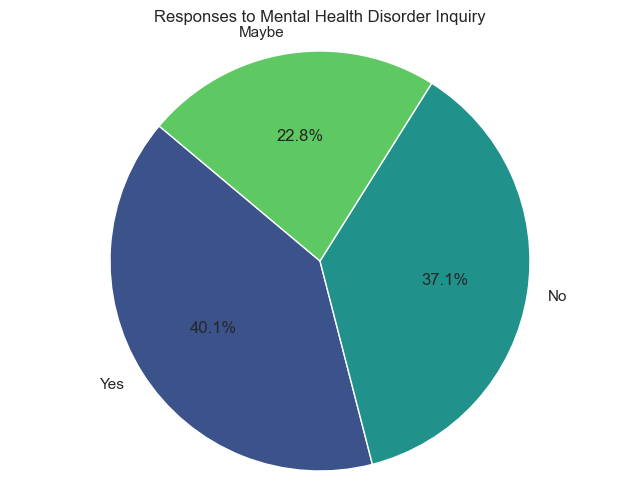

In [6]:
df = pd.DataFrame(Lishi_selected_data, columns=['Do you currently have a mental health disorder?'])
# Count occurrences of each response category
response_counts = df['Do you currently have a mental health disorder?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(response_counts['Count'], labels=response_counts['Response'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(response_counts)))

# Add a title
plt.title('Responses to Mental Health Disorder Inquiry')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


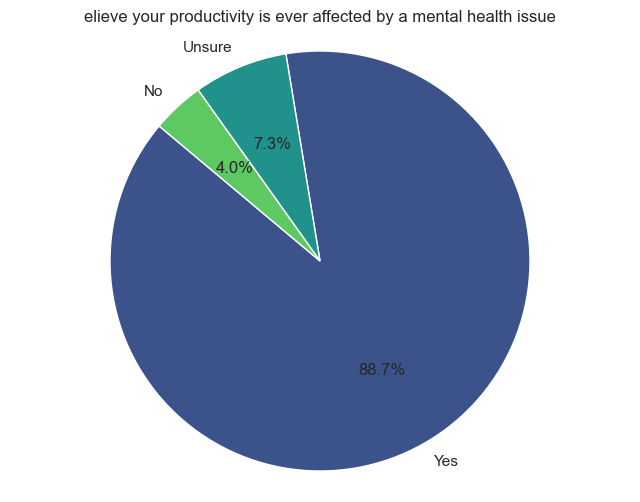

In [11]:
interfere_data = Lishi_selected_data[Lishi_selected_data['Do you currently have a mental health disorder?'] == 'Yes']
interfere_data_1 = pd.DataFrame(interfere_data, columns=['Do you believe your productivity is ever affected by a mental health issue?'])
# Count occurrences of each response category
response_counts = interfere_data_1['Do you believe your productivity is ever affected by a mental health issue?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(response_counts['Count'], labels=response_counts['Response'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(response_counts)))

# Add a title
plt.title('elieve your productivity is ever affected by a mental health issue')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


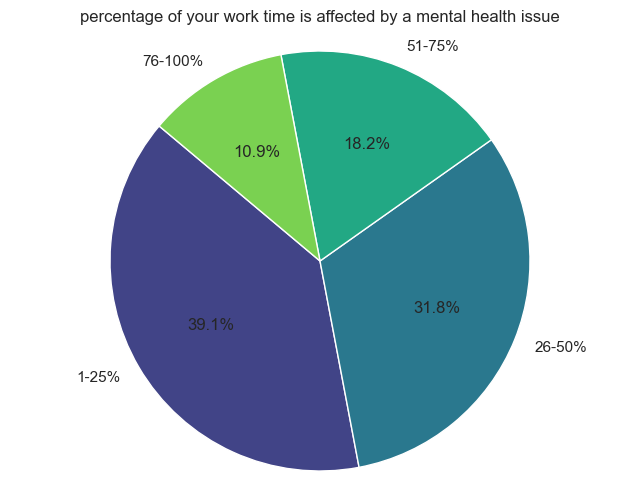

In [16]:
interfere_data = Lishi_selected_data[Lishi_selected_data['Do you currently have a mental health disorder?'] == 'Yes']
interfere_percentage_data = interfere_data[interfere_data['Do you believe your productivity is ever affected by a mental health issue?'] == 'Yes']
interfere_percentage_data = pd.DataFrame(interfere_percentage_data, columns=['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'])
# Count occurrences of each response category
response_counts = interfere_percentage_data['If yes, what percentage of your work time (time performing primary or secondary job functions) is affected by a mental health issue?'].value_counts().reset_index()
response_counts.columns = ['Response', 'Count']

# Set the theme for the plot
sns.set_theme(style="darkgrid")

# Set the figure size
plt.figure(figsize=(8, 6))

# Create a pie chart
plt.pie(response_counts['Count'], labels=response_counts['Response'], autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(response_counts)))

# Add a title
plt.title('percentage of your work time is affected by a mental health issue')

# Show the plot
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is circular.
plt.show()


In [31]:
missing_values = Lishi_selected_data.isnull().sum()

missing_columns = missing_values[missing_values > 0]

# Print columns with missing values
missing_columns.sample()

What is your gender?    3
dtype: int64

In [29]:
#filter data for countries
us_data = data_df[data_df['Country'] == 'United States']
other_countries_data = data_df[data_df['Country'] != 'United States']

# Analyze the Data
# 'treatment' column to see how many people sought treatment
us_treatment_count = us_data['treatment'].value_counts()  # Remove normalize=True
other_countries_treatment_count = other_countries_data['treatment'].value_counts()  # Remove normalize=True

# Filter to only include results where treatment = 'Yes'
us_treatment_yes = us_treatment_count.get('Yes', 0)  # Get the count for 'Yes', default to 0 if not found
other_countries_treatment_yes = other_countries_treatment_count.get('Yes', 0)  # Same for other countries

# Filter to only include results where treatment = 'No'
us_treatment_no = us_treatment_count.get('No', 0)  # Get the count for 'No', default to 0 if not found
other_countries_treatment_no = other_countries_treatment_count.get('No', 0)  # Same for other countries

# NO DataFrame for comparison
country_comparison_no_df = pd.DataFrame({
    'US': [us_treatment_no],
    'Other Countries': [other_countries_treatment_no]
})

# Yes DataFrame for comparison for getting treatment
country_comparison_df = pd.DataFrame({
    'US': [us_treatment_yes],
    'Other Countries': [other_countries_treatment_yes]
})

print(country_comparison_df)
#country_comparison_df

#print(country_comparison_no_df)
#country_comparison_no_df

    US  Other Countries
0  410              227


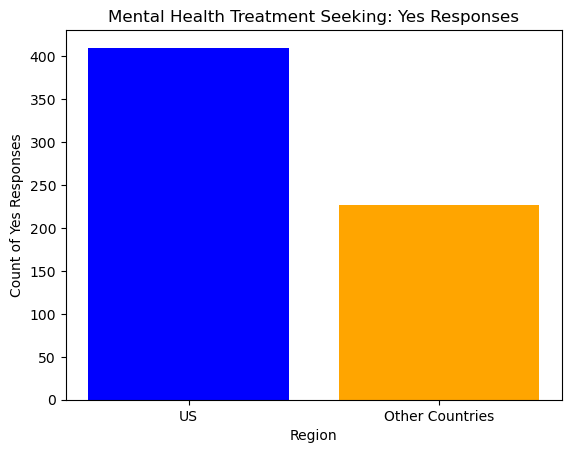

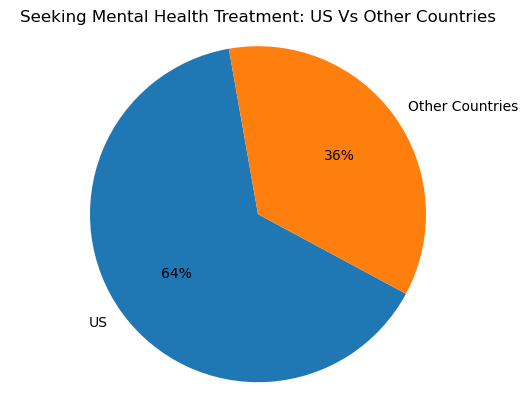

In [31]:
# Data for plotting
labels = ['US', 'Other Countries']
values = [us_treatment_yes, other_countries_treatment_yes]  # Use the 'Yes' counts

# Create a bar graph
plt.bar(labels, values, color=['blue', 'orange'])

# Add title and labels
plt.title('Mental Health Treatment Seeking: Yes Responses')  # Title for Yes responses
plt.xlabel('Region')
plt.ylabel('Count of Yes Responses')  # Y-axis label for Yes responses

# Show the graph
plt.show()

# Data for plotting
sizes = [us_treatment_yes, other_countries_treatment_yes]  # Use the 'Yes' counts

# Create a pie chart
plt.pie(sizes, labels=labels, autopct='%1.0f%%', startangle=100)  # Display whole numbers for percentages
plt.title('Seeking Mental Health Treatment: US Vs Other Countries')  # Title for Yes responses
plt.axis('equal')

# Show the chart
plt.show()